##### 1. Implement Euler simulation and draw a plot of $\mathbb E[ r_t ]$ on $t\in [0, 10]$.

We use the Euler Method to generate a path of $r_t$, and then calculate the mean of $r_t$, $t\in [0, 10]$.

In [1]:
from scipy import stats
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
# define the class of SDE
%cat SDE.py

import numpy as np
import matplotlib.pyplot as plt

class SDE:
    def __init__(self, Mu, Sigma, InitState):
        self.Mu = Mu
        self.Sigma = Sigma
        self.InitState = InitState
        
    def PrtCoef(self, x, t):
        print('At state x = ' + str(x) + ' time t = ' + str(t) + '\n')
        print('Mu ' + str(self.Mu(x, t)) + '\n')
        print('Sigma = ' + str(self.Sigma(x, t)) + '\n')
        
    def PrtInitState(self):
        print('Initial state is ' + str(self.InitState) + '\n')
        
    def Euler(self, T, N):
        x0 = self.InitState
        Mu = self.Mu
        Sigma = self.Sigma       
        t = np.linspace(0, T, N+1)
        
        Wh = np.zeros(N+1) #init BM
        Xh = x0 + np.zeros(N+1) #init Xh
        
        for i in range(N): #run EM
            DeltaT = t[i+1] - t[i]
            DeltaW = np.sqrt(t[i+1] - t[i]) * np.random.normal()
            Wh[i+1] = Wh[i] + DeltaW
            Xh[i+1] = Xh[i] + Mu(Xh[i], t[i]) * DeltaT + \
            

In [3]:
%run SDE.py

Initial state is 0.005



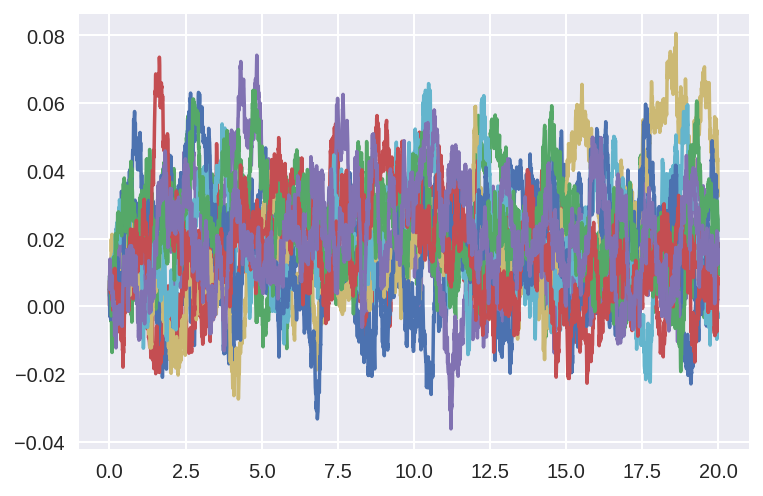

In [4]:
#define function Mu and Sigma and decide the parameters in the problem
alp = 2.11
b = 0.02
sig = 0.033
T = 10

Mu = lambda r,t: alp * (b - r)
Sigma = lambda r,t: sig
x0 = 0.005 #init state
iSDE = SDE(Mu, Sigma, x0) 
iSDE.PrtInitState()

plt.figure()
for i in range(10): 
    [t, Y, W] = iSDE.Euler(20., 4000); 
    plt.plot(t,Y);

#### 2. Find explicit form of $\mathbb E [r_t]$ and $\lim_{t\to \infty} \mathbb E [r_t]$.

We define $Y_t = F(t, r_t) = e^{\alpha t} r_t$, and we have

$$ \frac{\partial Y}{\partial t} = \alpha e_{\alpha t} r_t, \quad \frac{\partial Y}{\partial r_t} = \alpha e_{\alpha t}, \quad \frac{\partial^2 Y}{\partial r_t^2} = 0.$$
By the Ito lemma, we have

$$d Y_t = [\alpha e^{\alpha t} r_t + \alpha (b - r_t) e^{\alpha t} +0] d t + \sigma e^{\alpha t} d W_t. $$
Simplifying the above formula, we can get

$$d Y_t =  \alpha b e^{\alpha t}  d t + \sigma e^{\alpha t} d W_t ,$$
and doing integration on both sides, we have

$$ Y_t - Y_0 = \int_0^t \alpha b e^{\alpha s} ds + \int_0^t \sigma e^{\alpha s} d W_s,$$
where $Y_0 = e^{0} r_0 = r_0.$

So we have

$$
\begin{align}
 e^{\alpha t} r_t = r_0 + b e^{\alpha t} -b + \int_0^t \sigma e^{\alpha s} d W_s  \\
       =  b e^{\alpha t} + (r_0 - b) +   \int_0^t \sigma e^{\alpha s} d W_s.\\
\end{align}
$$
Easily we know the solution to the Vasicek model

$$ r_t = b + e^{-\alpha t} (r_0-b) + \int_0^t \sigma e^{\alpha (s-t)} d W_s.$$
Next we calculate the $\mathbb E[r_t]$ and $\lim_{t\to \infty} \mathbb E [r_t].$

$$
\mathbb E[r_t] = \mathbb E[b + e^{-\alpha t} (r_0-b) + \int_0^t \sigma e^{\alpha (s-t)} d W_s]  = b + e^{-\alpha t} (r_0-b).
$$
So we have

$$\lim_{t \to \infty} \mathbb E [r_t] = \lim_{t \to \infty} (b + e^{-\alpha t} (r_0-b))  =b. $$

#### 3. Zero bond price has the formula $$P(0, T) = \mathbb E[\exp\{-\int_0^T r(s) ds\}].$$ Find the exact value of $P(0,1)$.

In [5]:
# solve the exact value of the zero coupon bond
B = (1 - np.exp(- alp))/alp
A = (b - 0.5 * sig**2 / alp**2) * (B-1) - sig**2 /4/alp * B**2
P_01 = np.exp(- B * x0 + A)
print(f"The exact value of the zero coupon bond is: {P_01}")

The exact value of the zero coupon bond is: 0.9863895803459704


####  4. Run Euler, Milstein, exact simulation on $P(0,1)$ with different stepsizes, and find the covergence rate for each using linear regression. (Hint: one shall approximate integral with finite sum)

Since zero bond price has the formula $P(0, T) = \mathbb E[\exp\{-\int_0^T r(s) ds\}],$ and we can calculate the integral by the formula

$$\int_t^T r_s d s = \int_{t_0}^{t_1} r_s d s + \int_{t_1}^{t_2} r_s d s + \cdots + \int_{t_{n-1}}^{t_n} r_s d s,$$
where $t_0 = t$ and $t_n = T.$ So we can simulate $r_t$ firstly and then approximate the integral by

$$\int_t^T r_s d s = r_{t_0}(t_1 -t_0) + r_{t_1}(t_2 -t_1) + \cdots + r_{t_{n-1}}(t_n -t_{n-1}),$$
when we can guarantee $ max_{0 \leq i \leq n} (t_i - t_{i-1}) $ to be a very little number.

To exact simulate on $P(0,1)$, we know that the Vasicek model is a special form of Hull-White model when $g(t) = \alpha b,  h(t) = - \alpha$ and $\sigma(t) = \sigma$. And we know the exact simulation of the Hull-White model is

$$r_{t_{i+1}} = e^{H_{t_i, t_{i+1}}} r_{t_i} + \int_{t_i}^{t_{i+1}} e^{H_{t_i, t_{i+1}}} g(s) ds + \int_{t_i}^{t_{i+1}} e^{H_{t_i, t_{i+1}}} \sigma(s) d W_s, $$
where

$$H_{s,t} = \int_s^t h(u) d u .$$
So the exact simulation of the $r_t$ based on the Vasicek model is

$$r_{t_{i+1}} = e^{-\alpha \delta} r_{t_i} + b (1-e^{-\alpha \delta}) + \sqrt{\frac{\sigma^2}{2 \alpha} (1- e^{-2 \alpha \delta})} Z_i,$$
where $\delta = t_{i+1} -t_{i}$ and $Z_i \sim N(0,1)$ for every $i$ from 0 to n.

By the Euler method, we can estimate the $r_t$ by the formula

$$r_{t_{i+1}} = r_{t_i} + \alpha (b - r_{t_i}) \delta + \sigma \sqrt{\delta} Z_i ,$$
and by the Milstein method, we can estimate the $r_t$ by the formula

$$r_{t_{i+1}} = r_{t_i} + \alpha (b - r_{t_i}) \delta + \sigma \sqrt{\delta} Z_i + 0.5 \sigma^{'}(r_t) \sigma (r_t) (W^{2}_{t,t+1} - \delta).$$
Since $\sigma$ is a constant, the Milstein method is as same as the Euler method.

The code is as follow:

In [6]:
## define a new class include the three method related above.
%cat SDE_2.py

import numpy as np
import matplotlib.pyplot as plt

class SDE_2:
    
    """
    Initialize
    """
    def __init__(self, Mu, Sigma, InitState):
        self.Mu = Mu
        self.Sigma = Sigma
        self.InitState = InitState
        
        self.MuP = lambda x, t: 0 #first order derivative of Mu
                                #used for Milstein
        
    """
    Euler method
    """
    def Euler(self, T, N):
        x0 = self.InitState
        Mu = self.Mu
        Sigma = self.Sigma       
        t = np.linspace(0, T, N+1)
        DeltaT = T/N
        
        Wh = np.zeros(N+1) #init BM
        Xh = x0 + np.zeros(N+1) #init Xh
        
        for i in range(N): #run EM            
            DeltaW = np.sqrt(t[i+1] - t[i]) * np.random.normal()
            Wh[i+1] = Wh[i] + DeltaW
            Xh[i+1] = Xh[i] + \
                Mu(Xh[i], t[i]) * DeltaT + \
                Sigma(Xh[i], t[i])* DeltaW
            
        return t, Xh, Wh


    """
    Milstein -- Later
    

In [7]:
%run SDE_2.py

<Figure size 432x288 with 0 Axes>

In [8]:
#define function Mu and Sigma and decide the parameters in the problem
alp = 2.11
b = 0.02
sig = 0.033
T = 1

Mu = lambda r,t: alp * (b - r)
Sigma = lambda r,t: sig
r0 = 0.005 #init state

P=P_01 ## the exact value of the zero coupon bond

In [9]:
## creat a object iSDE
oSDE = SDE_2(Mu, Sigma, r0)
NumMesh = 1000
NumSimu = 100
deltaT=T/NumMesh

ArrLog2Steps = np.arange(6)
NumMinLog2Steps = 4 

ArrErr_Euler = np.zeros(ArrLog2Steps.size)
ArrErr_Milstein = np.zeros(ArrLog2Steps.size)
ArrErr_Exact = np.zeros(ArrLog2Steps.size)

for n in ArrLog2Steps:
    NumMesh = np.power(2, n + NumMinLog2Steps)
    errsum_Euler = 0
    errsum_Milstein = 0
    errsum_Exact = 0
        
    for i in range(NumSimu):
            
        ## Euler method
        [t, rh, Wh] = oSDE.Euler(T, NumMesh)
        PhT=np.exp(-1.0*deltaT*np.sum(rh))
        errsum_Euler = errsum_Euler + np.abs(PhT - P)
        ## plt.plot(t,rh)
        
        
        ## Milstein simulation
        [t, rh, Wh] = oSDE.Milstein(T, NumMesh)
        PhT=np.exp(-1.0*deltaT*np.sum(rh))         
        errsum_Milstein = errsum_Milstein + np.abs(PhT - P)
        ## plt.plot(t,rh)

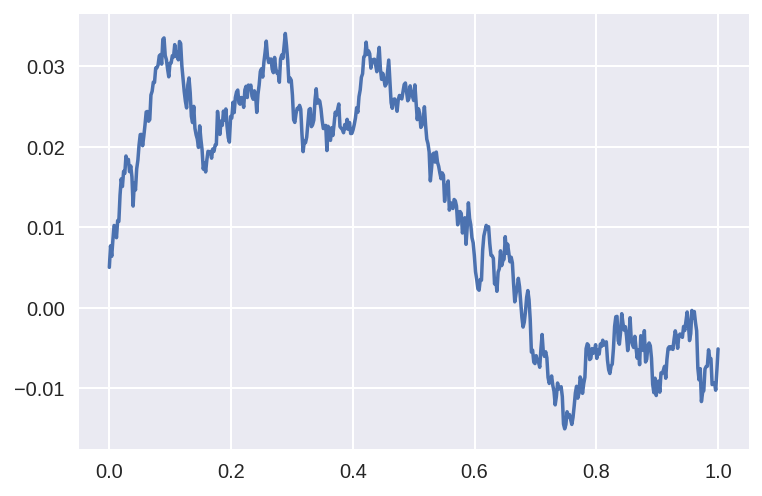

In [10]:
## Exact simulation
rh= oSDE.Exact(alp,b,T,sig,NumMesh)
PhT=np.exp(-1.0*deltaT*np.sum(rh))
errsum_Exact = errsum_Exact + np.abs(PhT - P) 
## print(PhT)
plt.plot(t,rh)
ArrErr_Euler[n] = errsum_Euler/NumSimu
ArrErr_Milstein[n] = errsum_Milstein/NumSimu
ArrErr_Exact[n] = errsum_Exact/NumSimu